In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## import sklearn libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import log_loss

In [4]:
## import tensorflow
import tensorflow as tf

In [5]:
## import related libraries within tensorflow, keras is already built in tensorflow 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks


In [6]:
## load the dataset and check the headings
heart_data= pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
## what are the data columns that may not be very well known to us?

## anemia= when the body doesnot have enough heathy red blood cells(so low levels of haemoglobins).  Red blood cells carry oxygen to body tissues.
## creatinine_phosphokinase= an enzyme, a protein that heps to elicit checmical changes in your body and is found in your heart, brain and skeletal muscles.  If the level is above threshold, there is a stress, injury in the body. Generally 10 to 120mcg/l is considered normal range. 
## diabetes= a disease with elevated levels of blood sugar.  This elevated levels of sugar seriously damages the heart, blood vessels and kidneys over time.
## ejection_fraction= refers to how well the heart pumps blood.  50% or higher is considered normal range. If it is less than 35% or below, it is a high risk of developing heart failure.
## high_blood_pressure= hypertension, and it affects the arteries.  when there is high blood pressure, it is harder to pump blood and the heart has to work harder, there is more pressure against the artery wall from the force of the blood pushing. 
## platelets= these are a component of blood and they are to help to form blood clots to slow or to stop bleeding and help wounds heal
## serum_creatinine= the measure of creatinine in your blood.  Creatinine is a waste product in the blood that comes from the muscles, healthy kidneys filter the creatinine out of the blood through urine. Unhealthy kidney cannot filter this waste properly. If kidney doesn't work well, the heart needs to pump harder to get the blood to the kidneys and this leads to heart failure.
## serum_sodium= the measure of sodium in your blood. The relation between water intake and water loss.  if sodium level is higher than 145mEq/l, that could lead to high blood pressure and heart failure. 
## time= follow-up period in days
## Death_event= if the patient has a or has not a probability of heart failure;  0 if No possibility of heart failure, 1 if Yes high possibility of heart failure

## Anemia, Diabetes, High blood pressure, Sex, Smoking and Death event are all shown as 0 or 1

## so based on the definitions of the columns, I expect to have high correlation for the following variables for heart failure; age, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, serum_sodium and time.

In [7]:
## check the data types and any missing values
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
## drop duplicates if there are any
heart_data.drop_duplicates(inplace=True)
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [9]:
## there are no missing values
## there are no duplicates
## all the values are numerical data types, float and integer
## check the statistics of the dataset - try the table format with .T

heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [10]:
## what is the data for?
## start with a hetmap to understand the correlations, the main predictor?
heart_data_corr_matrix= heart_data.corr()
heart_data_corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

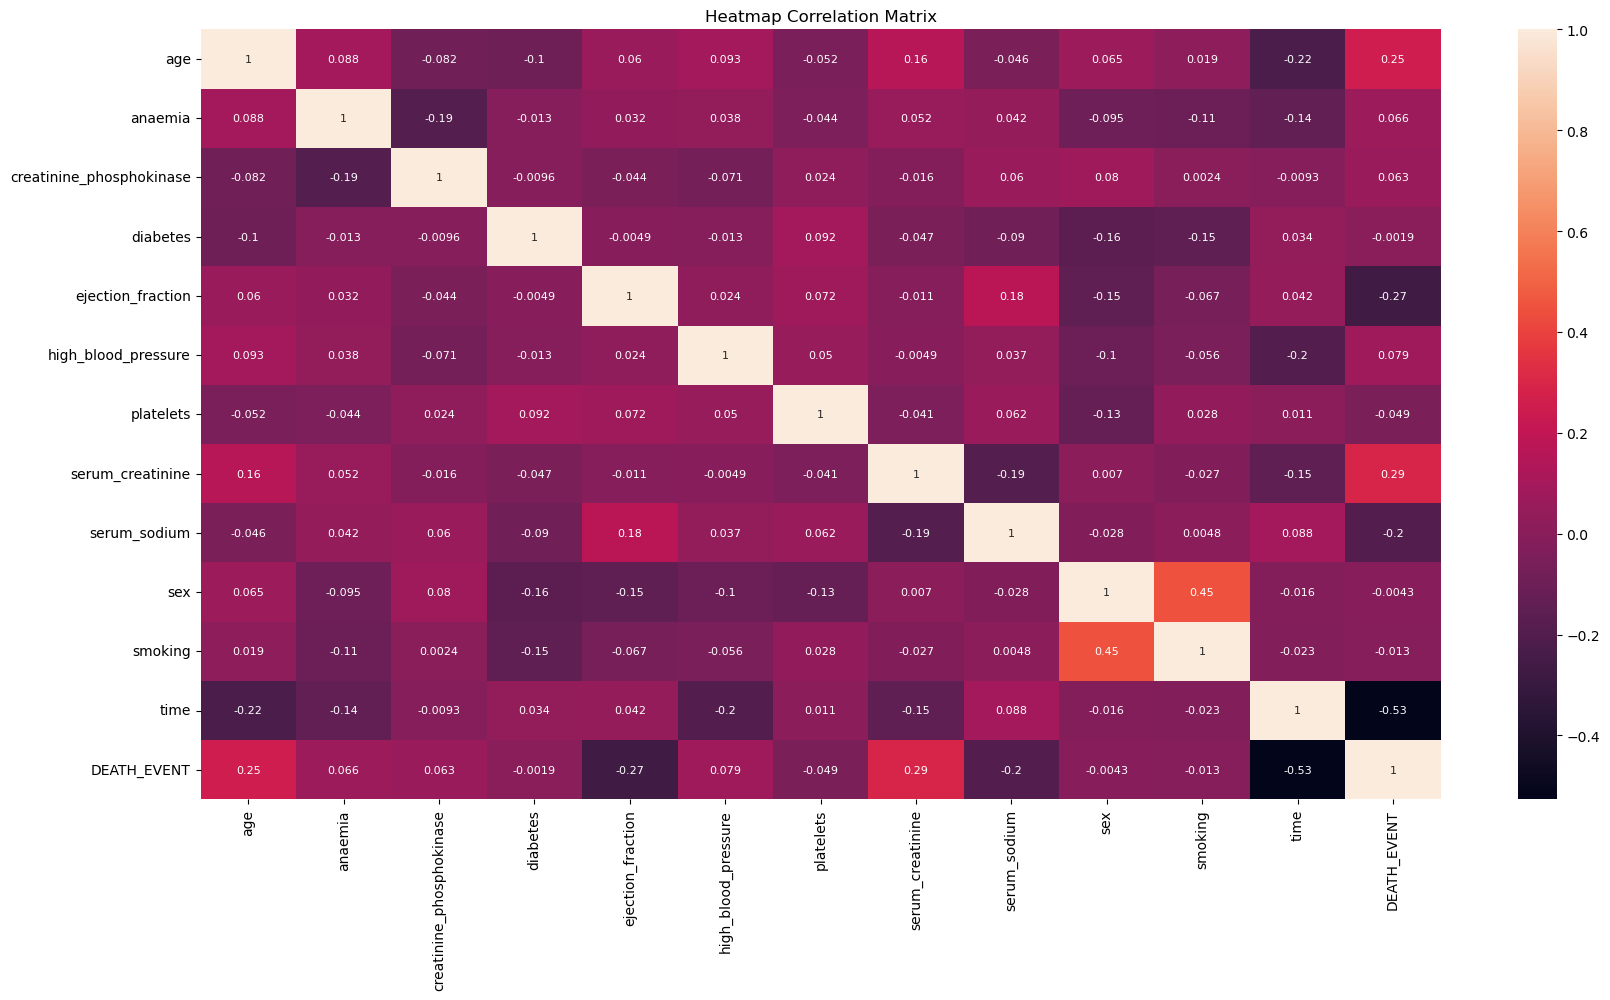

In [11]:
## plot the correlation matrix on a heatmap to see clearly the relations 
plt.figure(figsize=(20, 10))
sns.heatmap(heart_data_corr_matrix, annot=True, annot_kws={'size': 8})
plt.title('Heatmap Correlation Matrix', loc='center')

<function matplotlib.pyplot.show(close=None, block=None)>

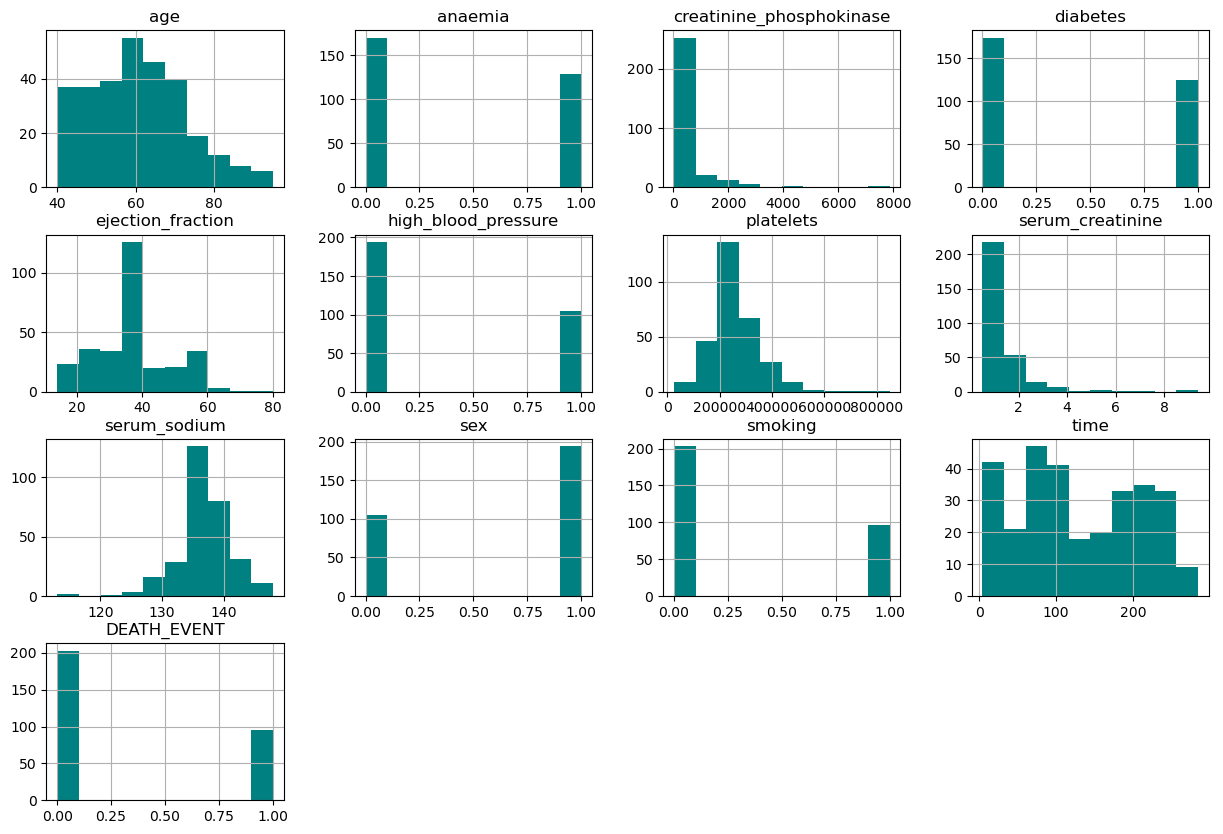

In [12]:
## so based on the heatmap; age, time, ejection_fraction, serum_creatinine are most highly correlated predictors
## interesting that acc to heatmap, creatinine_phosphokinase and diabetes are not really correlated and also contrary to general definitions 

## before going into each parameter, let me check each variables histogram plot
heart_data.hist(bins=10, figsize=(15,10), color='teal')
plt.show

<Axes: >

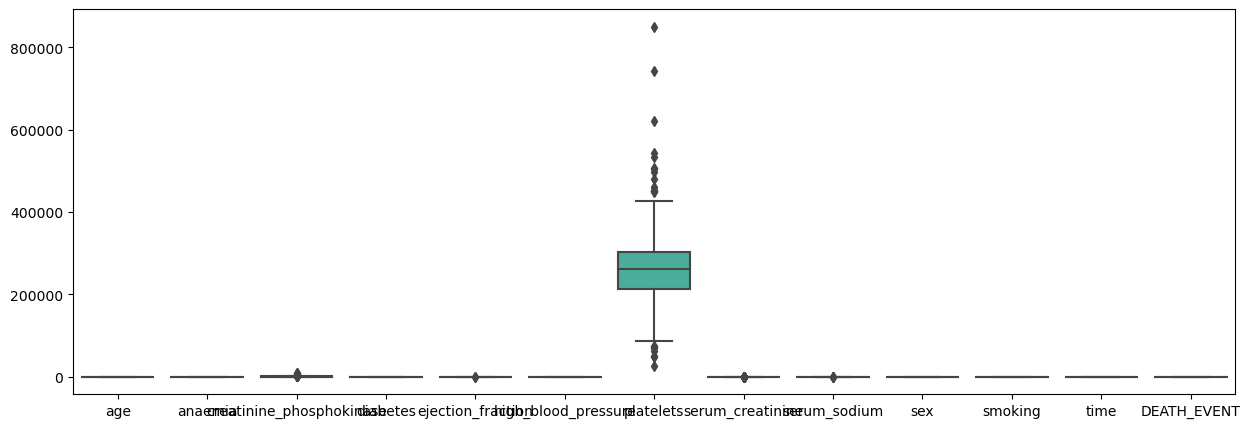

In [13]:
## check the outliers in the dataset
fig, ax= plt.subplots(figsize= (15, 5))
sns.boxplot(heart_data)

<function matplotlib.pyplot.show(close=None, block=None)>

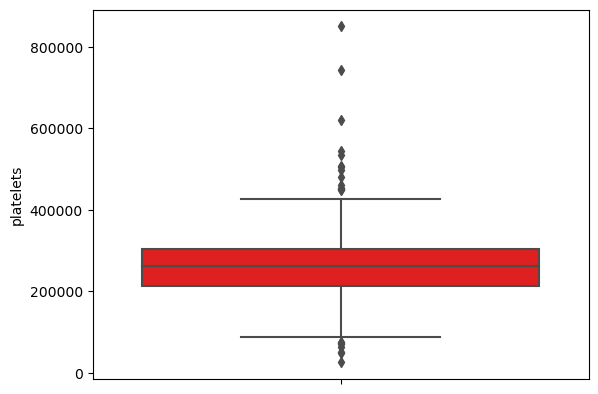

In [14]:
## especially platelets data may need adjusting, numbers are way off compared to others
## check platelets boxplot
sns.boxplot(y='platelets', data= heart_data, color= 'Red')
plt.show


In [15]:
## there are so many outliers, so platelets definetly need replacing
heart_data['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [18]:
## replace it with median as there is a big gap between the min and max so median will perform better
heart_data['platelets'].fillna(heart_data['platelets'].median(), inplace=True)

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/3714233306.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(heart_data['age'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/3714233306.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['age'][heart_data.DEATH_EVENT == 1], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

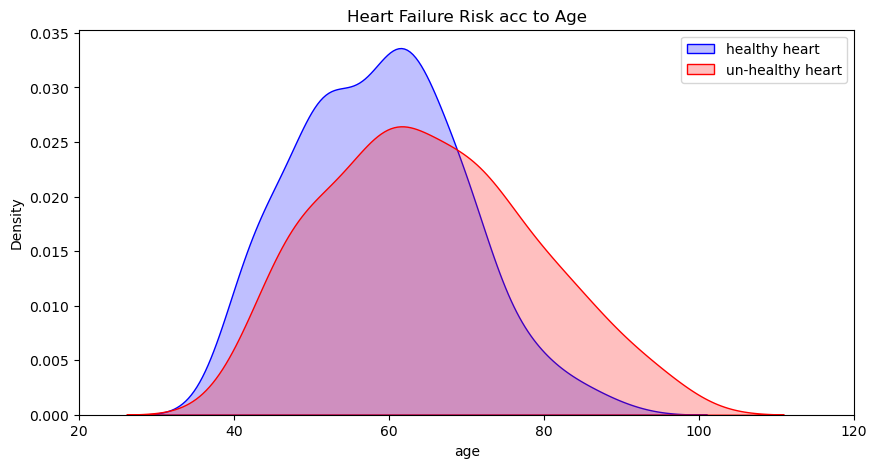

In [19]:
## let's check the Age vs Death Event
## Death_event=0 - good heart
## Death_event=1 - bad heart
plt.figure(figsize=(10,5))

ax = sns.kdeplot(heart_data['age'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
sns.kdeplot(heart_data['age'][heart_data.DEATH_EVENT == 1], color='red', shade=True)

plt.legend(['healthy heart', 'un-healthy heart'])
plt.title('Heart Failure Risk acc to Age')
ax.set(xlabel='age')
plt.xlim(20, 120)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

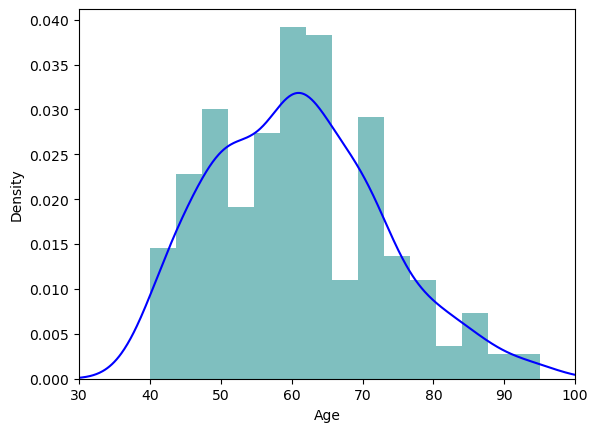

In [20]:
## plot histogram to see how the Age data is behaving
Age_histogram = heart_data['age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.5)
heart_data['age'].plot(kind='density', color= 'blue')
Age_histogram.set(xlabel= 'Age')
plt.xlim(30, 100)
plt.show

In [21]:
## so my plot is telling me that older age tends to have more heart problems, especially after 70 years old
## if I split the age, 'old_age' equal to or older than 70, call it 1, otherwise 0
heart_data['old_age']=np.where(heart_data['age'] >=70, 1, 0)
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,old_age
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0


In [22]:
## how many are in old_age
heart_data['old_age'].value_counts()

0    222
1     77
Name: old_age, dtype: int64

In [23]:
## so 77 people are aged 70 or more and 222 people are aged less than 70 years old

## how many people have high chance of heart failure overall?
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [24]:
## so 203 people are less likely and 96 people are more likely to have a heart failure

## so of these, how many are not in 'old_age', meaning younger than 70 have not heart disease or have heart disease
heart_data[heart_data['old_age'] ==0]['DEATH_EVENT'].value_counts()

0    164
1     58
Name: DEATH_EVENT, dtype: int64

In [25]:
## so out of 222 people who are younger than 70 yrs old, 164 people are less likley and 58 people are more likely

## so of these, how many are in 'old_age', meaning equal to or older than 70 have not heart disease or have heart disease
heart_data[heart_data['old_age'] ==1]['DEATH_EVENT'].value_counts()


0    39
1    38
Name: DEATH_EVENT, dtype: int64

In [371]:
## so out of 77 people who are equal to or older than 70 years old, 39 people are healthier and 38 people not so much

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/877950548.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(heart_data['time'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/877950548.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['time'][heart_data.DEATH_EVENT == 1], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

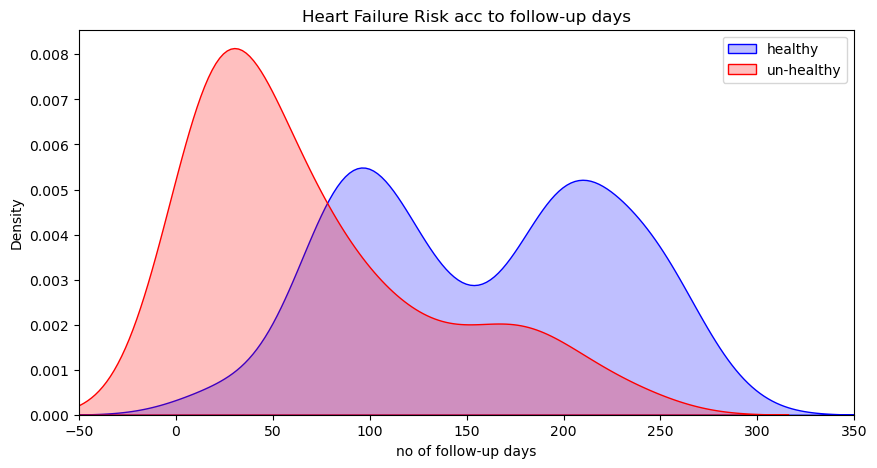

In [26]:
## let's check the Time vs Death Event
## what is time? no of days for follow-up for health checks
## Death_event=0 relates to healthy, good heart
## Death_event=1 relates to un-healthy, bad heart

plt.figure(figsize=(10,5))

ax = sns.kdeplot(heart_data['time'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
sns.kdeplot(heart_data['time'][heart_data.DEATH_EVENT == 1], color='red', shade=True)

plt.legend(['healthy', 'un-healthy'])
plt.title('Heart Failure Risk acc to follow-up days')
ax.set(xlabel='no of follow-up days')
plt.xlim(-50, 350)
plt.show

In [ ]:
## based on time vs death_event plot;
## the highest risk is to have zero follow up days on you, sudden heart failure at its peak
## if follow-up is less than 80 days, you are more likely to have a heart failure
## if follow-up is more than 80 days, you are not likely to have a heart failure
## makes sense as the longer the follow-up period in days, the more healthier you get due to constant health checks

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/1514989955.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(heart_data['ejection_fraction'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/1514989955.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['ejection_fraction'][heart_data.DEATH_EVENT == 1], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

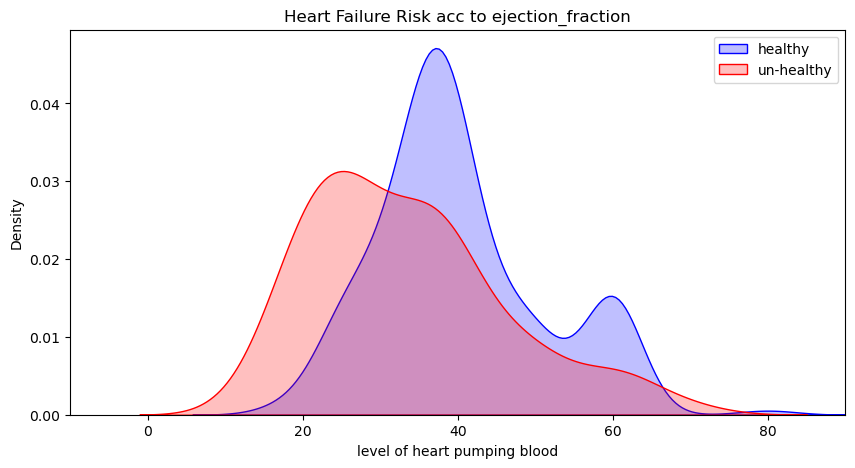

In [27]:
## let's check the ejection_fraction vs Death Event
## what is ejection_fraction? refers to how well the heart pumps blood.  50% or higher is considered normal range. If it is less than 35% or below, it is a high risk of developing heart failure.
# Death_event=0 - good heart
## Death_event=1 - bad heart

plt.figure(figsize=(10,5))

ax = sns.kdeplot(heart_data['ejection_fraction'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
sns.kdeplot(heart_data['ejection_fraction'][heart_data.DEATH_EVENT == 1], color='red', shade=True)

plt.legend(['healthy', 'un-healthy'])
plt.title('Heart Failure Risk acc to ejection_fraction')
ax.set(xlabel='level of heart pumping blood')
plt.xlim(-10, 90)
plt.show

In [ ]:
## the plot is telling me that the higher ejection_fraction level correlate to stronger heart as expected
## especially anything below 30% leads to more heart failure

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/2249953111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(heart_data['serum_creatinine'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_70350/2249953111.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['serum_creatinine'][heart_data.DEATH_EVENT == 1], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

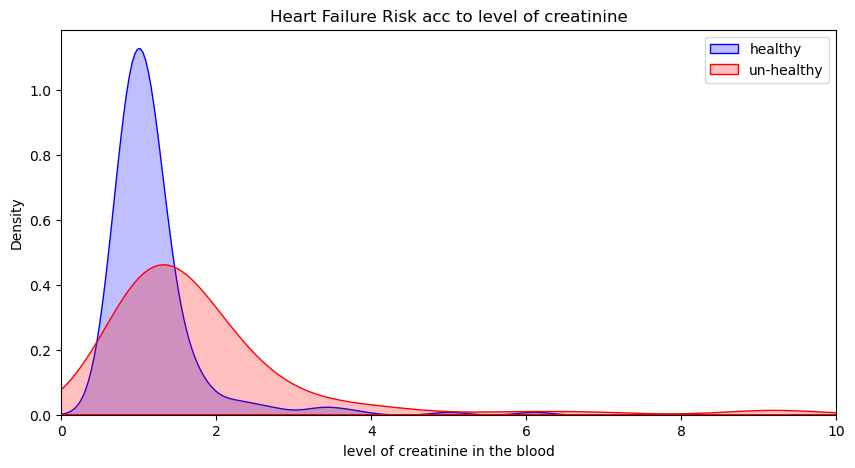

In [28]:
## let me check the last one; serum_creatinine against death_event
## serum_creatinine= the measure of creatinine in your blood.  Creatinine is a waste product in the blood that comes from the muscles, healthy kidneys filter the creatinine out of the blood through urine. Unhealthy kidney cannot filter this waste properly.
## Death_event=0 relates to healthy, good heart
## Death_event=1 relates to un-healthy, bad heart

plt.figure(figsize=(10,5))

ax = sns.kdeplot(heart_data['serum_creatinine'][heart_data.DEATH_EVENT == 0], color= 'blue', shade=True)
sns.kdeplot(heart_data['serum_creatinine'][heart_data.DEATH_EVENT == 1], color='red', shade=True)

plt.legend(['healthy', 'un-healthy'])
plt.title('Heart Failure Risk acc to level of creatinine')
ax.set(xlabel='level of creatinine in the blood')
plt.xlim(0, 10)
plt.show

In [ ]:
## this is again in line with the definition of high level of creatinine in the blood.  If the kidney is not healthy, it cannot filter the creatinine, cannot dispose out of the body.  Kidney failure can lead to heart failure. A creatinine level of 1.2 for women and 1.4 for man are the thresholds for analysis for kidney disease. As the heart needs to pump harder to transfer the blood to the kidney if these thresholds are passed, the continuous stress on the heart may lead to heart failure.  So this could be a very good indicator for heart failure prediction.

<function matplotlib.pyplot.show(close=None, block=None)>

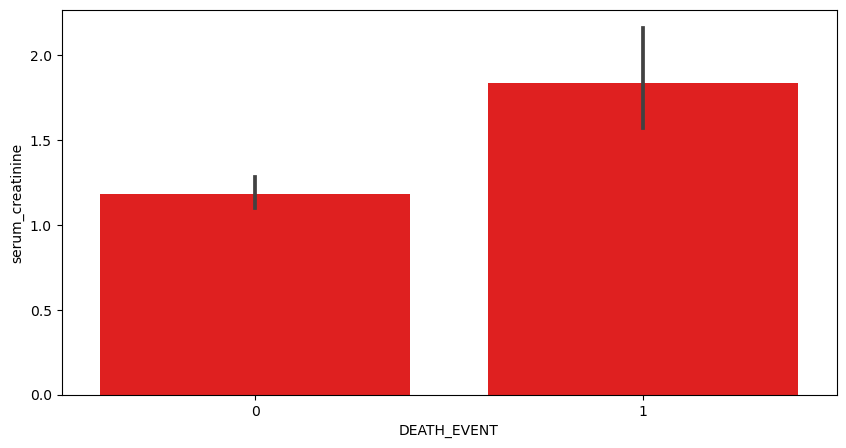

In [29]:
## check with barplot again = shows a similar picture as higher levels of creatinine in the blood leads to more heart failure
plt.figure(figsize=(10,5))
creatinine_level_barplot= sns.barplot(x='DEATH_EVENT', y='serum_creatinine', data= heart_data, color= 'Red')
plt.show

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'colormap'
  cset = contour_func(


<function matplotlib.pyplot.show(close=None, block=None)>

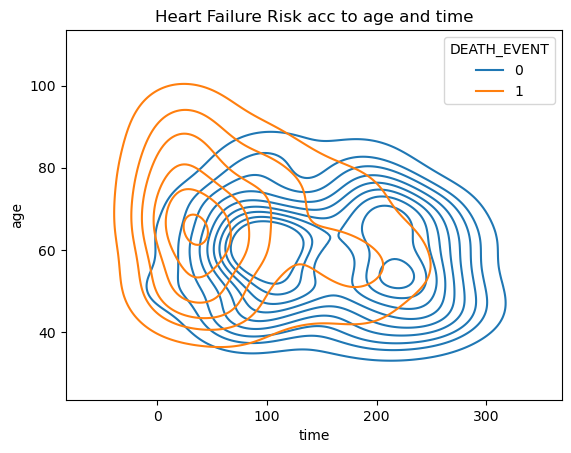

In [33]:
## can I check age, time and death_event all in one plot?
## Death_event=0 relates to healthy, good heart
## Death_event=1 relates to un-healthy, bad heart

sns.kdeplot(x=heart_data['time'], y=heart_data['age'], hue=heart_data['DEATH_EVENT'], colormap= 'magma')
plt.title('Heart Failure Risk acc to age and time')

plt.show

In [ ]:
## it is obvious from this plot that the follow-up days are highly correlated to the heart failure  as previously shown

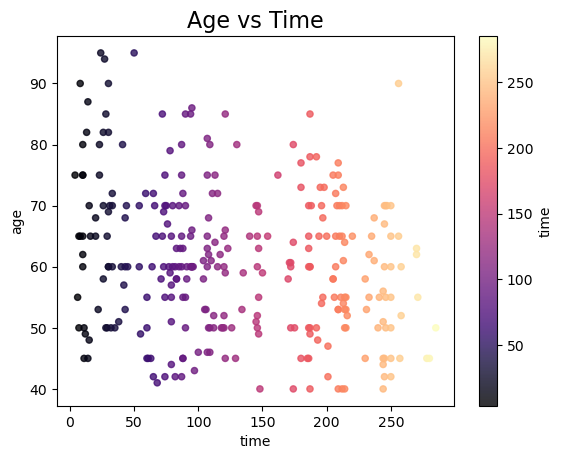

In [34]:
## let me try scatter plot with age and time
## can I introduce death_event on this scatter plot? check again later

heart_data.plot(kind='scatter', x='time', y='age', c='time', colormap='magma', alpha=0.8)
plt.title('Age vs Time', fontsize=16)
plt.gca().set_facecolor('none')


In [35]:
## defining my variables for training
## split DEATH_EVENT from the dataset for test/train

X= heart_data.drop(['DEATH_EVENT'], axis=1)
Y= heart_data['DEATH_EVENT']

In [36]:
## check if my variables are set properly
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  old_age                   299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [37]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 299 entries, 0 to 298
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [38]:
## split my variables for train and test variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=32)


In [39]:
## check again if my assumptions make sense
print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)

X_train size is: (239, 13)
X_test size is: (60, 13)
Y_train size is: (239,)
Y_test size is: (60,)


In [40]:
## standardization is necessary as the values are far from another in our dataset
## input data is transformed to have a mean of zero(0) and a variance of one(1)
## on our test should only be transformed to avoid overfitting
## without the standardization, the prediction does not work so check everytime if it is needed

scaler_x = StandardScaler()
X_train= scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
## I will try Support Vector Machine (SVM) and ANN so that I can then compare which one performs better for this dataset

In [41]:
## now I can train my model
## first set a Support Vector Machine(SVM) algorithm without kernel trick 

model_SVM= svm.SVC()
model_SVM.fit(X_train, Y_train)


SVC()

In [42]:
## make a prediction
Y_pred_SVM= model_SVM.predict(X_test)

In [43]:
## create a dataframe for prediction
heart_failure_prediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_SVM})
heart_failure_prediction.head()

,Actual,Predicted
109,0,1
264,0,0
285,0,0
19,1,1
123,0,0


In [44]:
## check accuracy
accuracy_SVM= accuracy_score(Y_test, Y_pred_SVM)
accuracy_SVM

0.7666666666666667

In [45]:
## check confusion matrix
conf_mat_SVM = confusion_matrix(Y_test, Y_pred_SVM)
conf_mat_SVM

array([[35,  6],
       [ 8, 11]])

In [46]:
## print the classification report
print(classification_report(Y_test, Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.65      0.58      0.61        19

    accuracy                           0.77        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.76      0.77      0.76        60



In [47]:
## plot the confusion matrix
## first import library for mlxtend
from mlxtend.plotting import plot_confusion_matrix

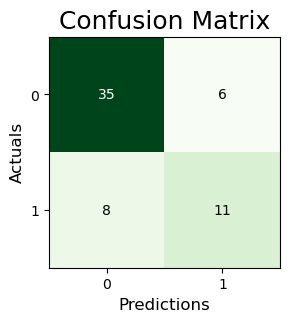

In [48]:
## then plot 
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SVM, figsize=(3,3), cmap='Greens')
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()


In [ ]:
## so my confusion matrix is telling me that I have 35 true negative and 11 true positive
## 35+6= 41= out of 41, 35 is predicted correctly
## 8+11=19 = out of 19, 11 is predicted correctly so my model is working

## but it could be better

AUC: 0.716303


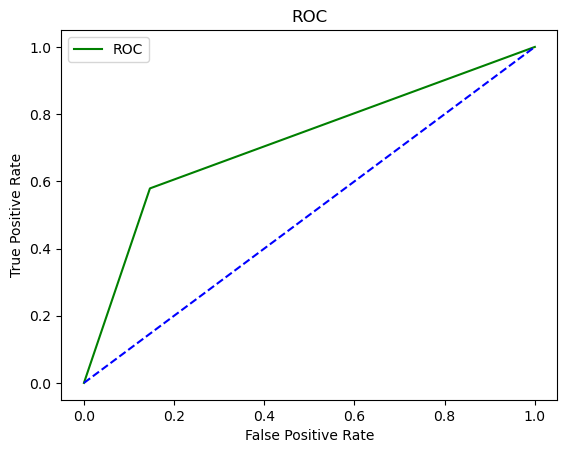

In [49]:
## plot the Area Under the Curver(AUC)
auc_mod1= roc_auc_score(Y_test, Y_pred_SVM)
print('AUC: %f' %auc_mod1)

## grab only 2 values, ignore thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_SVM)[0:2]
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## the AUC= 0.716 = this should be between 0 and 1, closer to 1 the better the model is working

In [483]:
## what happens if use kernel function for SVM?
## I will test all three kernel functions to compare and also to practice

linear_heart_SVM= svm.SVC(kernel='linear')
sigmoid_heart_SVM= svm.SVC(kernel='sigmoid')
rbf_heart_SVM= svm.SVC(kernel='rbf')

In [484]:
## train my models 
linear_heart_SVM.fit(X_train, Y_train)
sigmoid_heart_SVM.fit(X_train, Y_train)
rbf_heart_SVM.fit(X_train, Y_train)

SVC()

In [485]:
## make predictions for each
Y_pred_linear_SVM= linear_heart_SVM.predict(X_test)
Y_pred_sigmoid_SVM= sigmoid_heart_SVM.predict(X_test)
Y_pred_rbf_SVM= rbf_heart_SVM.predict(X_test)

In [486]:
## check each model's accuracy
print('Accuracy(linear):', metrics.accuracy_score(Y_test, Y_pred_linear_SVM))
print('Accuracy(sigmoid):', metrics.accuracy_score(Y_test, Y_pred_sigmoid_SVM))
print('Accuracy(rbf):', metrics.accuracy_score(Y_test, Y_pred_rbf_SVM))


Accuracy(linear): 0.85
Accuracy(sigmoid): 0.8
Accuracy(rbf): 0.7666666666666667


In [488]:
## so using a linear kernel with SVM gives us a better accuracy for our model

## let's check confusion matrix for linear SVM as it has the highest accuracy
conf_mat_linear_SVM= confusion_matrix(Y_test, Y_pred_linear_SVM)
conf_mat_linear_SVM

array([[37,  4],
       [ 5, 14]])

In [ ]:
## so my confusion matrix is telling me that I have 37 true negative and 14 true positive
## 37+4= 41= out of 41, 37 is predicted correctly
## 5+14=19 = out of 19, 14 is predicted correctly so my model is predicting well

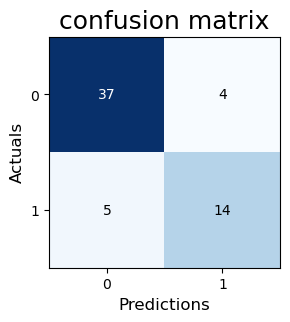

In [489]:
## plot confusion matrix for linear_SVM

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_linear_SVM, figsize=(3,3))
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('confusion matrix', fontsize = 18)
plt.show()

In [490]:
## check the classification report for linear SVM
print(classification_report(Y_test, Y_pred_linear_SVM))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



AUC: 0.716303


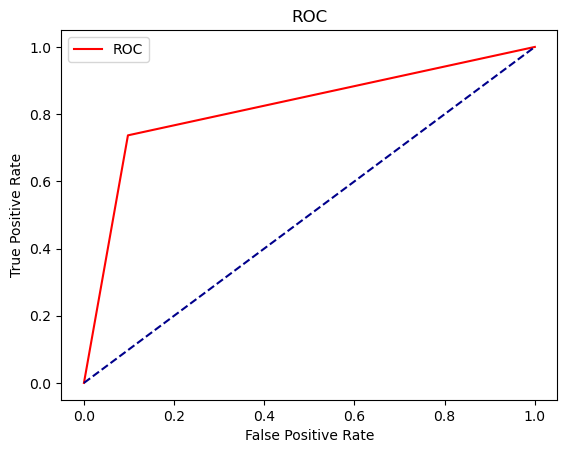

In [493]:
## plot the Area Under the Curver(AUC)
auc_mod_linear_SVM= roc_auc_score(Y_test, Y_pred_linear_SVM)
print('AUC: %f' %auc_mod1)

fpr, tpr = roc_curve(Y_test, Y_pred_linear_SVM)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## Linear_SVM model for our heart_failure dataset works well with a accuracy of 85% even though our AUC score stays the same at 71.6%

In [393]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  old_age                   299 non-null    int64  
dtypes: float64

In [460]:
## apply early stopping
## this will prevent to overrun the data for unnecessary epochs

early_stopping= callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

In [462]:
## create a ANN model
## import libraries as shown at the top

## input layer
## hidden layer
## regularization - to help me stop overfitting
## output layer
## set the variable as model_heart_ML1
## Sequential - input layer to hidden layer to output layer

model_heart_ML1= Sequential()

## input layers
## unit is behaving like a neuron, self defined parameter
## keep adjusting the unit parameter to find the best practice, depending on the requirement of the model
## also pay attention to overfitting, do not make it complex
## units=16 for this model but change it later for comparison

## we use kernel_initializer for weight ,it will improve convergence
## activation function - transmitting info - reLU is best used
## Relu will convert all the negatives to 0, will not touch the positives

## so check the dataset - what is the no of columns?
## our dataset is in total 14 columns, but deduct death_event, so use 13
## if I get this wrong, python will tell me the correct one  

model_heart_ML1.add(Dense(units= 16, kernel_initializer= 'uniform', activation= 'relu', input_dim= 13))

## hidden layer
## set hidden layer as the half of the first layer, so use 8 - (1 hidden layer with 8 neurons)

model_heart_ML1.add(Dense(units= 8, kernel_initializer= 'uniform', activation= 'relu'))

## regularization to prevent overfitting - Dropout
## make sure that my network understands the patterns in my data
## 0.25 = 25% randomly inside my unit will be set to zero, for training
## to make prediction on the test set
## I can change the percentage for dropout but leave it like this for now

model_heart_ML1.add(Dropout(0.25))

## set the output layer
## in binary classification, we have two mutually exclusive classes, so my output unit is set to 1.
## and I will use Sigmoid function 
## if this was a multi layer classifications, there will be more than two mutually exclusive classes, so the output layer will be set to no of classes and would use Softmax function
 

model_heart_ML1.add(Dense(units= 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

## compile the ANN
## optimizer = how the weight is updated
## there are several optimizers - the best use case is 'adam' optimizer is the most effective
## my expectation is that my loss will reduce so that my accuracy will increase
## so minimize the errors
## use 'binary cross entropy' for loss function as this is a binary classification 
## if this was a multi class classificcation, then I would have used 'categorical cross entropy' for loss function

 
model_heart_ML1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])


In [463]:
## check the summary
model_heart_ML1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                224       
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [464]:
## training our network
## batch size = will be determined how complex the algorithm
## to compute and update weight
## my training dataset is divided into smaller subsets
## dataset is a simple one so I'll use 32

## epochs = will determine how my model will check the entire dataset during training
## no of epochs= reinforcing the understanding of the dataset, I'll use 80 but beware of overfitting

## add callbacks for early stopping, this will stop the overrunning of the epochs

## validation split = to balance, to check  training set, assign a proportion of training data
## I use 20% testing above,and 25% for validation so the remaining 55% for training

history = model_heart_ML1.fit(X_train, Y_train, batch_size=32, epochs=80, callbacks=early_stopping, validation_split=0.25)

Epoch 1/80


6/6 [==============================] - 0s 15ms/step - loss: 0.6927 - accuracy: 0.6536 - val_loss: 0.6917 - val_accuracy: 0.7333
Epoch 2/80
6/6 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6592 - val_loss: 0.6902 - val_accuracy: 0.7333
Epoch 3/80
6/6 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.6592 - val_loss: 0.6887 - val_accuracy: 0.7333
Epoch 4/80
6/6 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6592 - val_loss: 0.6871 - val_accuracy: 0.7333
Epoch 5/80
6/6 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6592 - val_loss: 0.6854 - val_accuracy: 0.7333
Epoch 6/80
6/6 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6592 - val_loss: 0.6835 - val_accuracy: 0.7333
Epoch 7/80
6/6 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6592 - val_loss: 0.6813 - val_accuracy: 0.7500
Epoch 8/80
6/6 [============================

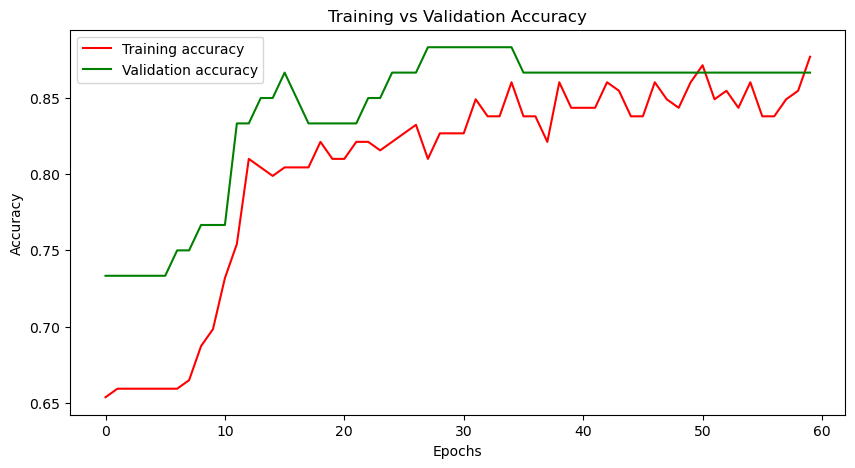

In [496]:
## finally I am happy with the model
## my accuracy is 0.877 and val_accuracy is 0.8667 so they are close enough
## can I plot to see the how they behave against each other?

history_df= pd.DataFrame(history.history)

plt.figure(figsize=(10,5))
plt.plot(history_df.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

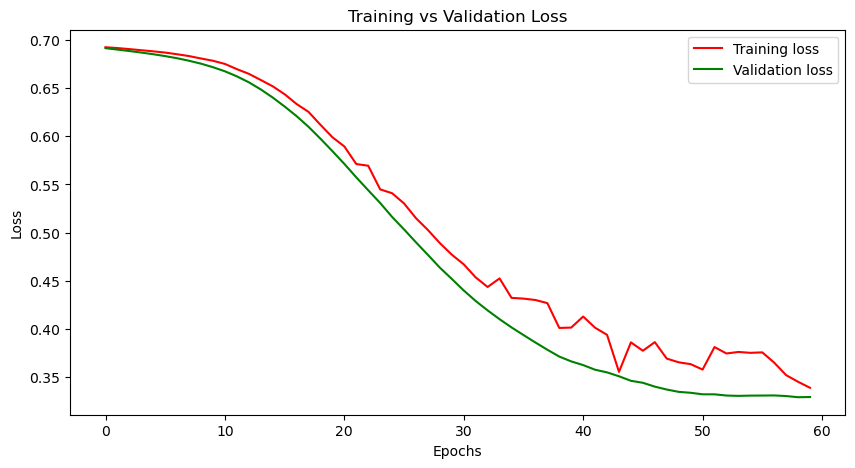

In [480]:
## can I plot to see the how loss behave against each other?
## what is the significance of plotting this? to see whether the accuracy is increasing while the loss is decreasing

plt.figure(figsize=(10,5))
plt.plot(history_df.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(history_df.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [465]:
## after adjusting all the metrics, and running the model several time, I finally saved my model as I am content with it
## save my model
## it saves as a folder with that name
model_heart_ML1.save('heart_failure_ann_model')

INFO:tensorflow:Assets written to: heart_failure_ann_model/assets


In [466]:
## load this model
Heart_ANN_model= tf.keras.models.load_model('heart_failure_ann_model') 

In [467]:
## create a prediction
Y_pred_ANN= Heart_ANN_model.predict(X_test)
Y_pred_ANN

2/2 [==============================] - 0s 1ms/step


array([[0.19539759],
       [0.10769124],
       [0.067715  ],
       [0.53385866],
       [0.31864527],
       [0.10708701],
       [0.4779087 ],
       [0.00970408],
       [0.1653025 ],
       [0.16921844],
       [0.18291083],
       [0.38610837],
       [0.49959153],
       [0.9191918 ],
       [0.3120453 ],
       [0.20448472],
       [0.30266276],
       [0.12918553],
       [0.26853245],
       [0.14607395],
       [0.5361624 ],
       [0.659129  ],
       [0.1531592 ],
       [0.14568362],
       [0.4983937 ],
       [0.12771238],
       [0.09518746],
       [0.695493  ],
       [0.32819647],
       [0.23705961],
       [0.84838444],
       [0.07346184],
       [0.93496776],
       [0.15949272],
       [0.9033444 ],
       [0.09768037],
       [0.07642762],
       [0.12786901],
       [0.05439798],
       [0.96195686],
       [0.75546956],
       [0.69022375],
       [0.14746709],
       [0.15964453],
       [0.67730165],
       [0.10501776],
       [0.825197  ],
       [0.936

In [469]:
## the prediction seems to be giving values between 0 and 1s 
## classification report should work like this but kept giving an error
## so I have to cap the values between 0 and 1 with a threshold of 0.5 to make it work

Y_pred_ANN= np.where(Y_pred_ANN >0.5, 1, 0)


In [470]:
## now that the values are converted with a threshold, I can print the classification report

print(classification_report(Y_test, Y_pred_ANN))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [471]:
## calculate the confusion mattix for ANN prediction

CM_heart_ANN = confusion_matrix(Y_test, Y_pred_ANN)
CM_heart_ANN


array([[37,  4],
       [ 6, 13]])

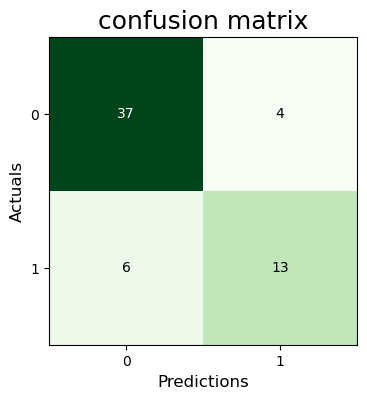

In [479]:
## My true negative = looks very good for predicting 37 people correctly out of 41  = 90% correct prediction
## My false positive - Type 1 error = is predicting falsely for only 4 people as likely to have a heart failure, but in fact they are all healthy = 10% incorrect prediction

## My true positive = looks correct for predicting 13 people likely to have a heart failure correctly out of 21 = 62% correct prediction
## My false negative - Type 2 error = is predicting falsely for 6 people who are actually likely to have heart failure as healthy = 28% incorrect prediction

## plot the confusion matrix plot to see this clearly

fig, ax = plot_confusion_matrix(conf_mat=CM_heart_ANN, figsize=(4,4), cmap="Greens")
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('confusion matrix', fontsize = 18)
plt.show()

AUC: 0.793325


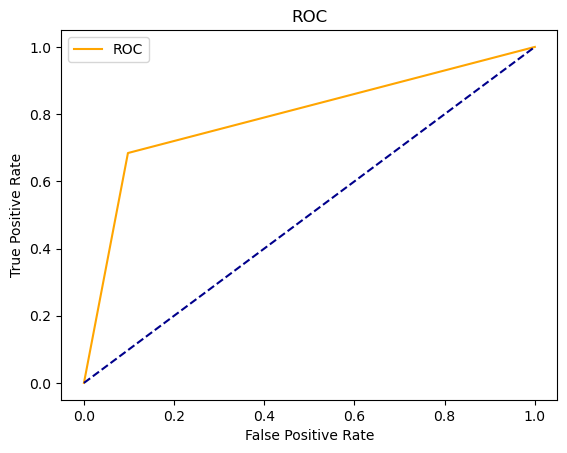

In [473]:
## plot the Area Under the Curver(AUC)
auc_mod_ANN= roc_auc_score(Y_test, Y_pred_ANN)
print('AUC: %f' %auc_mod_ANN)

## grab only 2 values, ignores thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_ANN)[0:2]
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## my Ares Under the Curve (AUC) is at 79% is better as it is much closer to 1

## based on these models;SVM, linear_SVM and ANN;
## Linear_SVM performed better with a slightly higher accuracy rate of 85% compared to ANN with accuracy of 83%
## Both ANN and Linear_SVM performed well so do we really need to build a ANN model when Linear_SVM is performing well?
## If I try to add more layers to the ANN model, the accuracy may improve but I don't see the benefit on this dataset 
## So it is down to the complexity of the dataset and the cost implications will determine the type and depth of the model